In [70]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import matplotlib

In [71]:
df = pd.read_csv('C:\\Users\\STEVEN\\Documents\\Thinkful\\Files\\bike_data.csv')
temps = pd.read_csv('C:\\Users\\STEVEN\\Documents\\Thinkful\\weather_data_v2.csv')

# Datasets
For this capstone project,  I will be looking at the bicycling data collected in Chattanooga, Tennesse, referred to as 'Chat' from now on, from their Bike Chat service.  This data set was originally found through Socrata(see link https://data.chattlibrary.org/Transportation/Bike-Chattanooga-Trip-Data/8yba-nwv8Clients.) It contains about 243,000 individual rides recorded from 2012-2017.  It contains information regarding the start station, end station, start time and date, end time and date, individual client id number and trip duration.

Another dataset was pulled from NOAA and it contains the local weather from the airport for everyday throughout our time frame.  This dataset includes mean temp, high temp, low temp, wind speeds, precipitation, types of precipitation, amount of precipitation.  

A bit more about this data is that clients have the opportunity to purchase either day-week passes or year long passes. These two are split into groups called "subscribers" and "customers."  Subscribers for annual passes and customers for short term clients.  There is a seperate class called dependent, but this appears to be made up mostly of test data.  


# Clarity to Data

We are working with two csv files, one for bikes and one for temperatures.  I want to make sure both are properly formatted before I begin.  

To start, we take a look at the size and struture of the two csv files.

In [3]:
print(df.shape)
print(temps.shape)

print('\n')
print(df.loc[0,:])
print('\n')
print(temps.loc[0,:])

(243417, 15)
(2558, 22)


MemberType                        Subscriber
TripDurationSec                          235
BikeID                                C00198
StartDay                             Tuesday
StartDateTime               11/27/2012 17:17
StartDate                         11/27/2012
StartTime                              17:17
StartStationName    Market St & ML King Blvd
StartStationID                          1325
EndDay                               Tuesday
EndDateTime                 11/27/2012 17:21
EndDate                           11/27/2012
EndTime                                17:21
EndStationName         Market St & Cowart St
EndStationID                            1311
Name: 0, dtype: object


STN---         723240
WBAN            13882
 YEARMODA    20110101
   TEMP          56.5
                   24
   DEWP          51.9
  .1               24
  SLP          1016.7
  .2               14
  STP           991.3
  .3               24
 VISIB            5.7
  .4      

In [4]:
#As we can see the temp data looks skewed and may be pulling in extra white
#spaces. Let's adjust.
temps = temps.rename(columns=lambda x: x.strip())

print(temps.loc[0,:])



STN---        723240
WBAN           13882
YEARMODA    20110101
TEMP            56.5
                  24
DEWP            51.9
.1                24
SLP           1016.7
.2                14
STP            991.3
.3                24
VISIB            5.7
.4                24
WDSP             5.4
.5                24
MXSPD             15
GUST              21
MAX               64
MIN             46.9
PRCP           0.80G
SNDP           999.9
FRSHTT         10010
Name: 0, dtype: object


Much better.
Let's begin investigating the data by first seperating out the subscriber and the customer data.

In [5]:
subscriber_data = df[df['MemberType'] == 'Subscriber']
customer_data = df[df['MemberType'] == 'Customer']


Now that our populations are conveniently split let's pose our three questions we will be trying to answer.  

# Questions:

1.  Who uses bicycles longer, customers or subscribers? Are the bicycle usage rates normally distributed?  What kind of distribution do they represent?

2. What stations are the most popular?  Are there certain areas that are popular for both subscribers and customers?  Are there a significant amount of round trip bike rides or one way rides? 

3. Finally what are the overall trends of bicycle usage?  Throughout the programs life?  On a month to month basis? Is there a certain time of day when the bicycles are being used? What is temperature's effect on bicycle riding?  Is it significant?


# Question 1:

Who uses bicycles longer, customers or subscribers? Are the bicycle usage rates normally distributed? What kind of distribution do they represent?

In [72]:
#We will start by pulling an average amount of seconds spent on bicycles by
#customers and subscribers.  
subscriber_secs = subscriber_data.TripDurationSec.mean() 
customer_secs = customer_data.TripDurationSec.mean()

#Seconds can be frustrating to easily comprehend let's convert to minutes 
subscriber_mins = subscriber_secs / 60
customer_mins = customer_secs / 60

print(subscriber_mins)
print(customer_mins)



21.782466243530717
687.4073327976847


Text(0.5,1,'Average Time Use Per Ride')

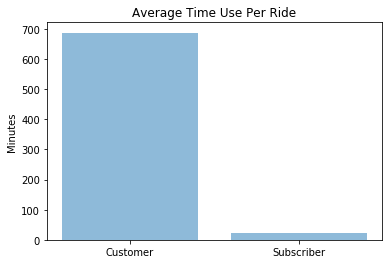

In [8]:
#Perfect now lets use this data to create a bar graph

objects = ('Customer', 'Subscriber')
y_pos = np.arange(len(objects))
time = [customer_mins, subscriber_mins]
 

plt.bar(y_pos, time, align='center', alpha=.5)
plt.xticks(y_pos, objects)
plt.ylabel('Minutes')
plt.title('Average Time Use Per Ride')

As you can see the graph shows that the average subscriber uses the bicycle significantly less than the average customer. 
This seems slightly suspect since the customer will be billed for any extra time over 60 minutes and it appears that the average customer is renting the bicycles for about 11.5 hours.
At this time we will attempt to isolate any outliers.  

We will use a cut off of one week, assuming anything longer than that is stolen.  The actual data is probably somewhat smaller but we want to be able to pull from feasible potential data.  


In [11]:
#now to remove the outliers
normalized_df = df[df['TripDurationSec'] < 86400]

normalized_subscriber_data = normalized_df[normalized_df['MemberType'] == 'Subscriber']
normalized_customer_data = normalized_df[normalized_df['MemberType'] == 'Customer']

#Now to pull from the mean time bikes were in use
normalized_subscriber_secs = normalized_subscriber_data.TripDurationSec.mean() 
normalized_customer_secs = normalized_customer_data.TripDurationSec.mean()

normalized_subscriber_mins = normalized_subscriber_secs / 60
normalized_customer_mins = normalized_customer_secs / 60



Text(0.5,1,'Average Time Use Per Ride')

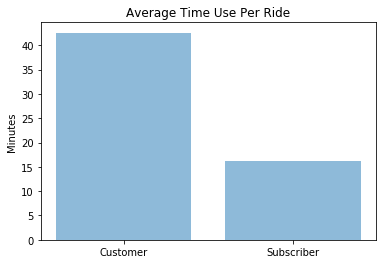

In [15]:
#Time to toss it in a graph

objects = ('Customer', 'Subscriber')
y_pos = np.arange(len(objects))
time = [normalized_customer_mins, normalized_subscriber_mins]
 

plt.bar(y_pos, time, align='center', alpha=.5)
plt.xticks(y_pos, objects)
plt.ylabel('Minutes')
plt.title('Average Time Use Per Ride')

This seems a bit more of what we might expect from this data.  This result makes me believe there may be some test data or entry errors in the data that were significantly pushing out the amount of time a bike was used.  Or perhaps some bicycle's journey never ended.  

One thing that is interesting would be how many rides go over the 1 hour mark and are thus charged a fee by the bike service. 


Text(0.5,0,'Data Sets')

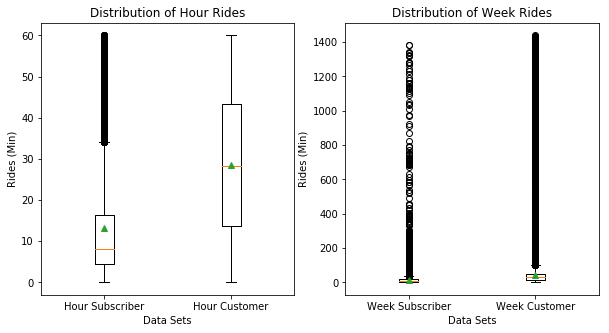

In [130]:
#Let's isolate for an hour or less and compare.  


#Change these graphs to box plots!!!!!!!!!!

hour_df = df[df['TripDurationSec'] <= 3600]
hour_subscriber_data = hour_df[hour_df['MemberType'] == 'Subscriber']
hour_customer_data = hour_df[hour_df['MemberType'] == 'Customer']

hour_subscriber_mins = (hour_subscriber_data.TripDurationSec)/60 
hour_customer_mins = (hour_customer_data.TripDurationSec)/60

week_subscriber_mins = normalized_subscriber_data.TripDurationSec / 60 
week_customer_mins = normalized_customer_data.TripDurationSec / 60
dataset=[hour_subscriber_mins, hour_customer_mins, week_subscriber_mins, week_customer_mins]

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)    
plt.boxplot(dataset[:2], showmeans=True)
plt.xticks(range(1,3), ('Hour Subscriber', 'Hour Customer'))
plt.title('Distribution of Hour Rides')
plt.ylabel('Rides (Min)')
plt.xlabel('Data Sets')

plt.subplot(1,2,2)
plt.boxplot(dataset[2:4], showmeans=True, manage_xticks=True)
plt.xticks(range(1,3),('Week Subscriber', 'Week Customer'))
plt.title('Distribution of Week Rides')
plt.ylabel('Rides (Min)')
plt.xlabel('Data Sets')

This is interesting.  Subscriber rides are more or less the same, but the customer is significantly different.  Suggesting that customers are more apt to go over.  Perhaps viewing it as a one time cost and the subscriber's know better.  

Now that we have been able to see the seperation of different bicycle rides. Lets find the distributions and check for normaility between the two different groups.  For when they are riding within the one hour free period.

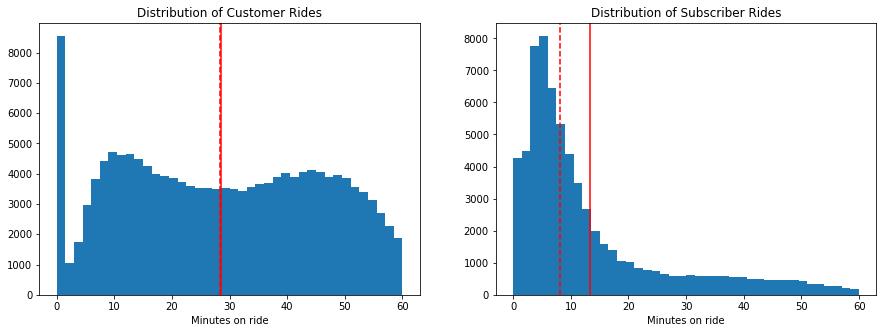

In [75]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.hist(hour_customer_data['TripDurationSec']/60, bins=40)
plt.xlabel('Minutes on ride')
plt.title('Distribution of Customer Rides')
plt.axvline((hour_customer_data['TripDurationSec']/60).mean(), color='r',linestyle='solid')
plt.axvline((hour_customer_data['TripDurationSec']/60).median(), color='r',linestyle='dashed')

plt.subplot(1,2,2)
plt.hist(hour_subscriber_data['TripDurationSec']/60, bins=40)
plt.xlabel('Minutes on ride')
plt.title('Distribution of Subscriber Rides')
plt.axvline((hour_subscriber_data['TripDurationSec']/60).mean(), color='r',linestyle='solid')
plt.axvline((hour_subscriber_data['TripDurationSec']/60).median(), color='r',linestyle='dashed')

This is very interesting.  In the customer rides there is a large porportion of rides that seem to never have really started, but for the rest of the time there appears to be an almost equal likelihood of any length of ride.  Our Subscriber distribution seems to represent an exponential decay graph. 

In [23]:
#now that we have created a histogram for the two data set lets take a closer look 
#at the individual statistics.
print('Customer Data')
print((hour_customer_data.TripDurationSec/60).describe())
print('Variance = {}'.format(round((hour_customer_data.TripDurationSec/60).var(ddof=1),2)))
print('\n')
print('Subscriber Data')
print((hour_subscriber_data.TripDurationSec/60).describe())
print('Variance = {}'.format(round((hour_subscriber_data.TripDurationSec/60).var(ddof=1),2)))

Customer Data
count    149010.000000
mean         28.557202
std          16.988399
min           0.000000
25%          13.716667
50%          28.283333
75%          43.316667
max          60.000000
Name: TripDurationSec, dtype: float64
Variance = 288.61


Subscriber Data
count    67131.000000
mean        13.293701
std         13.354565
min          0.016667
25%          4.550000
50%          8.200000
75%         16.333333
max         59.983333
Name: TripDurationSec, dtype: float64
Variance = 178.34


The variance echoes the facts of the graph. Especially with the large segment of 0 minute rides.  This appears to be what we would expect.  

Now that we've seen the graphs and been able to see a bit of information about them we shall now complete a qq plot to see if there is any normal distribution.  We will be plotting against a graph with a mean of 0 and standard deviation of 1

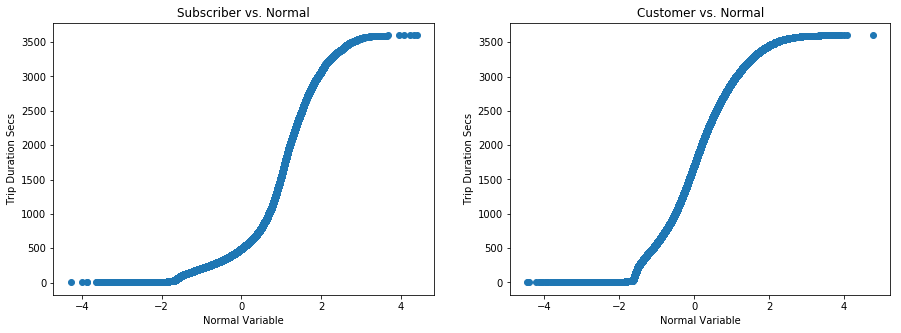

In [29]:
subscriber_dist = hour_subscriber_data[hour_subscriber_data['TripDurationSec'].notnull()]['TripDurationSec'].values
norm_subscriber = np.random.normal(0, 1, len(hour_subscriber_data['TripDurationSec'].dropna()))  
customer_dist = hour_customer_data[hour_customer_data['TripDurationSec'].notnull()]['TripDurationSec'].values
norm_customer = np.random.normal(0, 1, len(hour_customer_data['TripDurationSec'].dropna())) 

subscriber_dist.sort()
norm_subscriber.sort()
customer_dist.sort()
norm_customer.sort()

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(norm_subscriber, subscriber_dist, 'o')
plt.title('Subscriber vs. Normal')
plt.xlabel('Normal Variable')
plt.ylabel('Trip Duration Secs')

plt.subplot(1,2,2)
plt.plot(norm_customer, customer_dist, 'o')
plt.title('Customer vs. Normal')
plt.xlabel('Normal Variable')
plt.ylabel('Trip Duration Secs')

plt.show()

In [30]:
# It seems fairly certain that this data is not normally distributed.
#The shape of the histograms represents logistic growth and could be further explored
#In ann exponential decay vs normal qq plot.

Text(0,0.5,'Trip Duration Secs')

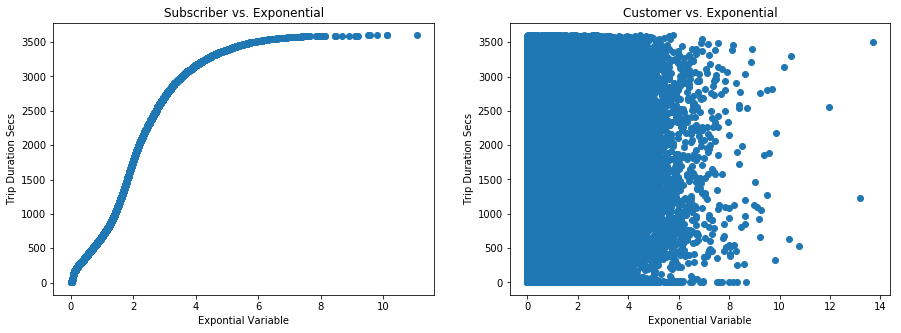

In [76]:
#Below we will plot the subscriber and customer vs. an exponential function
norm_subscriber = np.random.normal(0, 1, 1000)
exp_subscriber = np.random.exponential(scale=1, size=len(hour_subscriber_data['TripDurationSec'].dropna()))
exp_customer = np.random.exponential(scale=1, size=len(hour_customer_data['TripDurationSec'].dropna()))

exp_subscriber_2.sort()
norm_subscriber.sort()
exp_subscriber.sort()

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(exp_subscriber, subscriber_dist, 'o')
plt.title('Subscriber vs. Exponential')
plt.xlabel('Expontial Variable')
plt.ylabel('Trip Duration Secs')

plt.subplot(1,2,2)
plt.plot(exp_customer, customer_dist, 'o')
plt.title('Customer vs. Exponential')
plt.xlabel('Exponential Variable')
plt.ylabel('Trip Duration Secs')



In [103]:
#Let's take a look at the similarity between our two data groups of 
#customers and subscribers.

from scipy.stats import ttest_ind
print(ttest_ind(hour_subscriber_data['TripDurationSec']/60, hour_customer_data['TripDurationSec']/60, equal_var=False))

Ttest_indResult(statistic=-225.20761661281816, pvalue=0.0)


The t test reveals that the multiple data sets are much more different than expected and appear to be fairly confident that they are from different populations.  

The subscriber is fairly close to an exponential decay, but customer definetly isn't.  We have two distinct data sets that are definetly not normalized.  

In [32]:
morning_subscriber = subscriber_data[(subscriber_data['StartTime'] >"04:00:00") & (subscriber_data['StartTime'] < "10:00:00")]
afternoon_subscriber = subscriber_data[(subscriber_data['StartTime'] >"10:00:00") & (subscriber_data['StartTime'] < "14:00:00")]
evening_subscriber = subscriber_data[(subscriber_data['StartTime'] >"14:00:00") & (subscriber_data['StartTime'] < "19:00:00")]
night_subscriber = subscriber_data[(subscriber_data['StartTime'] >"19:00:00") & (subscriber_data['StartTime'] < "4:00:00")]

# Question 2: 

Next we will look at the particular areas the bicycles are used.  Are there certain areas that are popular for both subscribers and customers?  Are there a significant amount of round trip bike rides or are the significantly one way rides?

Let's begin by evaluating the top 3 stations for the two different kinds of group.  

In [77]:
customer_data.StartStationName.value_counts().head(3)

200 River St Outdoor Chattanooga         22869
100 Walnut St                            20280
Hubert Fry Center Tennessee Riverpark    11430
Name: StartStationName, dtype: int64

In [78]:
subscriber_data.StartStationName.value_counts().head(3)

200 River St Outdoor Chattanooga    4273
E Main St & Rossville Ave           3761
Market St & Cowart St               3601
Name: StartStationName, dtype: int64

Here we have made an interesting discovery that the subscribers and customers do not necessarily use the same station the most. I am curious to see if any of the stations are used as a round trip or just a one-way bike.

In [79]:
subscriber_station = subscriber_data[subscriber_data["StartStationName"] == subscriber_data['EndStationName']]
customer_station = customer_data[customer_data['StartStationName'] == customer_data['EndStationName']]

In [80]:
customer_station.StartStationName.value_counts().head(3)

200 River St Outdoor Chattanooga         7526
Hubert Fry Center Tennessee Riverpark    7248
100 Walnut St                            6221
Name: StartStationName, dtype: int64

In [81]:
subscriber_station.StartStationName.value_counts().head(3)

Hubert Fry Center Tennessee Riverpark    1489
200 River St Outdoor Chattanooga         1467
Market St & Cowart St                     740
Name: StartStationName, dtype: int64

That's interesting, we can see that most of the roundtrips revolve around a few of the stations.  Some of the most popular stations for the subscriber werent in the total trips.  Lets see what percent of their rides are round trip.  

Text(0.5,1,'Subscriber vs. Subscriber Same Station')

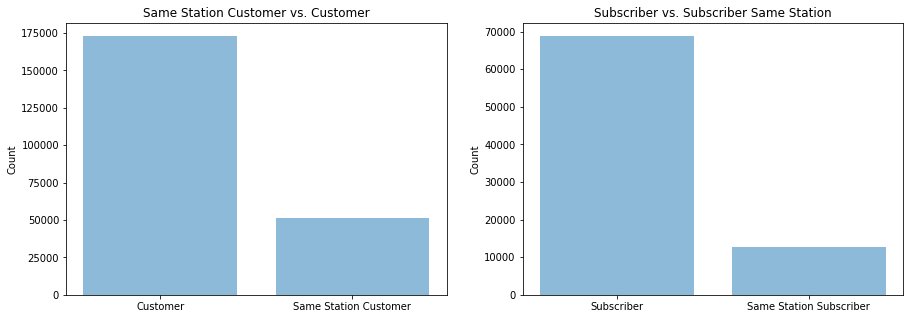

In [82]:
total_subscriber_station = subscriber_station.shape[0]
total_subscriber = subscriber_data.shape[0]
total_customer_station = customer_station.shape[0]
total_customer = customer_data.shape[0]

#Now to easily view this in a graph we will compare the two different groups.
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
stations = ('Customer', 'Same Station Customer')
y_pos = np.arange(len(stations))
period = [total_customer, total_customer_station]
 

plt.bar(y_pos, period, align='center', alpha=.5)
plt.xticks(y_pos, stations)
plt.ylabel('Count')
plt.title('Same Station Customer vs. Customer')

plt.subplot(1,2,2)
stations_2 = ('Subscriber', 'Same Station Subscriber')
y_pos = np.arange(len(stations_2))
period = [total_subscriber, total_subscriber_station]
 

plt.bar(y_pos, period, align='center', alpha=.5)
plt.xticks(y_pos, stations_2)
plt.ylabel('Count')
plt.title('Subscriber vs. Subscriber Same Station')

In [83]:
#With this graphic it appears that less subscribers in proportion 
#take round trip rides than customers.  Let's investigate deeper. 

print("Customer Percent:")
print(round(total_customer_station/total_customer*100,2))
print('\n')
print('Subscriber Percent:')
print(round(total_subscriber_station/total_subscriber*100,2))

Customer Percent:
29.7


Subscriber Percent:
18.44


That's interesting it appears that customers are significantly more likely to complete a round trip excursion than the subscriber.  

This brings up an interesting question of why the customers may be more likely to be round trippers than the subscriber. 
Taking a look at the geographical positioning of certain stations we can see that the most frequented stations like '200 River' 
is located near a green belt and these bikes may be a means to better consume the surrounding landscape.  

# Question 3: 

Finally what are the overall trends of bicycle usage throughout the years?  On a month to month basis? Is there a certain time of day when the bicycles are being used?  How serious is temperatures effect on bicycle riding?  Is it statistically significant?



When investigating the years it was discovered that some errors were made 
and years such as 2020 and 2031 existed in the data.

We will also need to convert part of our data to datetime format to properly call the data and create graphs.  

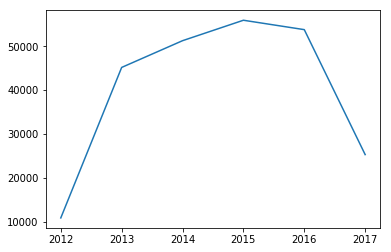

In [48]:
df['StartDate'] = pd.to_datetime(df['StartDate'])
df['StartTime'] = pd.to_datetime(df['StartTime'])

df["Year"] = df.StartDate.dt.year
clean_year = df[df['Year'] < 2018]

clean_year.Year.value_counts().sort_index().plot()

Upon further investigation it appears that the program began in 2012 and the 2017 data is incomplete.  

In [49]:
#Next we will take a quick look at the amount of usage over the months.

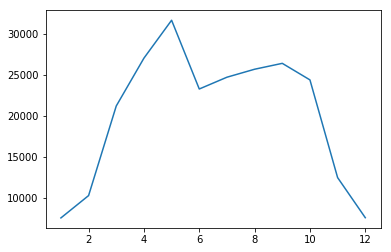

In [50]:
df['Month'] = df.StartDate.dt.month
df. Month.value_counts().sort_index().plot()

This is very interesting.  Interest in bicycling severly falls off during the winter months and experiences peaks during spring and summer while suffering a drop during peak summertime.  

In [84]:
#Next we will look at bike usage over
#certain time intervals in an average day for subscribers.  

morning_subscriber = subscriber_data[(subscriber_data['StartTime'] >"04:00:00") & (subscriber_data['StartTime'] < "10:00:00")]
afternoon_subscriber = subscriber_data[(subscriber_data['StartTime'] >"10:00:00") & (subscriber_data['StartTime'] < "14:00:00")]
evening_subscriber = subscriber_data[(subscriber_data['StartTime'] >"14:00:00") & (subscriber_data['StartTime'] < "19:00:00")]
night_subscriber = subscriber_data[(subscriber_data['StartTime'] >"19:00:00") & (subscriber_data['StartTime'] < "4:00:00")]

#Getting counts of how often someone borrowed a bicycle during certain timeframes.
morning_count = morning_subscriber.shape[0]
afternoon_count = afternoon_subscriber.shape[0]
evening_count = evening_subscriber.shape[0]
night_count = night_subscriber.shape[0]

print(morning_count)
print(afternoon_count)
print(evening_count)
print(night_count)

1000
18769
25627
15007


Text(0.5,1,'Bike Usage for Subscribers')

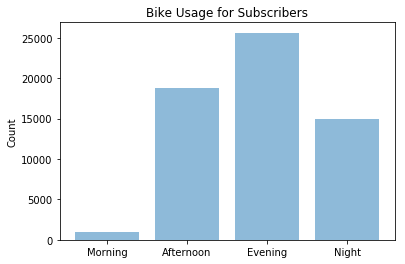

In [54]:
time_periods = ('Morning', 'Afternoon', 'Evening', "Night")
y_pos = np.arange(len(time_periods))
period = [morning_count, afternoon_count, evening_count, night_count]
 

plt.bar(y_pos, period, align='center', alpha=.5)
plt.xticks(y_pos, time_periods)
plt.ylabel('Count')
plt.title('Bike Usage for Subscribers')

Not what I expected to see.  Bike rides in the morning are by far the least populated class.  This seems to show that the subscribers are not using them for transportation to work as a primary reasoning.  

Now we can look at how the temperature will effect people riding their bicycles.  

In [85]:
#Let's revisit our different possible columns.
print(temps.head())
print(list(temps.columns.values))

   STN---  WBAN    YEARMODA     TEMP         DEWP    .1    SLP      .2  \
0  723240  13882   20110101     56.5  24     51.9    24   1016.7    14   
1  723240  13882   20110102     42.3  24     28.8    24   1022.2    24   
2  723240  13882   20110103     32.6  24     16.7    24   1026.6    24   
3  723240  13882   20110104     37.0  24     23.5    24   1021.3    24   
4  723240  13882   20110105     35.2  24     29.7    24   1016.7    23   

     STP     ...      .4    WDSP    .5   MXSPD    GUST     MAX      MIN    \
0    991.3   ...      24     5.4    24    15.0    21.0        64     46.9   
1    996.7   ...      24     6.4    24    13.0    15.0      60.1       34   
2   1001.0   ...      24     2.2    24     8.9   999.9      46.9       23   
3    995.9   ...      24     1.3    24     7.0   999.9        54       23   
4    991.1   ...      24     1.4    24     8.0   999.9        54       28   

   PRCP    SNDP   FRSHTT  
0   0.80G  999.9   10010  
1   1.72G  999.9       0  
2   0.00G  

In [57]:
#We will attempt to see the differnces in year temperatures.    
#We need to isolate for our years active.  
#Getting counts of how often someone borrowed a bicycle during certain timeframes.

short_temps = temps[temps['YEARMODA'] > 20111231]
short_temps = short_temps[short_temps['YEARMODA'] < 20171231]

Text(0.5,1,'Temperatures over the Years')

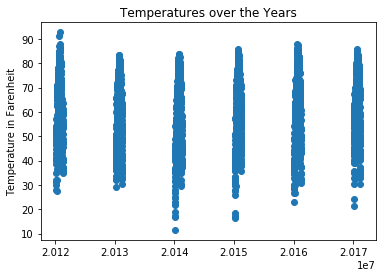

In [59]:
plt.scatter(x=short_temps['YEARMODA'], y=short_temps['TEMP'])

#plt.xticks('2012', '2013', '2014', '2015', '2016', '2017')
plt.ylabel('Temperature in Farenheit')
plt.title('Temperatures over the Years')

This gives us a brief overview of the different temperatures that Chat will experience throughout the year.

In [60]:
#Lets take a look at a general description of the max tempurature. 
short_temps.TEMP.describe()

count    2191.000000
mean       62.025194
std        15.366723
min        11.500000
25%        49.800000
50%        64.800000
75%        75.500000
max        92.700000
Name: TEMP, dtype: float64

In [89]:
#we can now see that the maximum temperature throughout the data frame is 
#92.7 Faranheit.  Wow that is fairly warm.  Let's find every day with a mean temperature
#over 90 and see if they had any effect on bicycle rentals
high_temps = short_temps[short_temps["TEMP"] > 90.00]
print(high_temps)

     STN---   WBAN  YEARMODA  TEMP      DEWP  .1     SLP  .2    STP  ...    \
546  723240  13882  20120630  91.0  24  66.1  24  1011.2  24  987.3  ...     
547  723240  13882  20120701  92.7  24  65.3  24  1013.1  24  989.3  ...     

     .4  WDSP  .5  MXSPD   GUST    MAX   MIN    PRCP   SNDP FRSHTT  
546  24   1.7  24    8.0  999.9  107.1    70   0.00G  999.9      0  
547  24   3.2  24    8.0  999.9  107.1  75.9   0.00G  999.9      0  

[2 rows x 22 columns]


Based on what we've found it looks like the only two days with means over 90 were at the end of June and beginning of July.  Due to the fact that the bike program was not around at this time.  This does not provide a reasonable date.  This sample size is a little small so we will lower the cutoff to 87.

In [87]:
high_temps = short_temps[short_temps["TEMP"] > 87.00]

print(high_temps)

      STN---   WBAN  YEARMODA  TEMP      DEWP  .1     SLP  .2    STP  ...    \
545   723240  13882  20120629  87.1  24  63.2  24  1013.7  24  989.7  ...     
546   723240  13882  20120630  91.0  24  66.1  24  1011.2  24  987.3  ...     
547   723240  13882  20120701  92.7  24  65.3  24  1013.1  24  989.3  ...     
554   723240  13882  20120708  87.9  24  69.0  24  1015.4  24  991.4  ...     
2000  723240  13882  20160623  87.7  24  66.0  24  1016.5  24  992.5  ...     
2028  723240  13882  20160721  87.4  24  68.0  24  1019.1  24  995.1  ...     

      .4  WDSP  .5  MXSPD   GUST    MAX   MIN    PRCP   SNDP FRSHTT  
545   24   2.7  24    8.0  999.9    106    64   0.00G  999.9      0  
546   24   1.7  24    8.0  999.9  107.1    70   0.00G  999.9      0  
547   24   3.2  24    8.0  999.9  107.1  75.9   0.00G  999.9      0  
554   24   5.2  24   12.0  999.9     99    73   0.00G  999.9      0  
2000  24   7.7  24   14.0   20.0     97    73   0.00G  999.9      0  
2028  24   3.2  24    8.0 

From this data set we can see that on the 23rd of June of 2016 was an incredibly warm day of 87.7.  Now lets compare the rentals on this day in comparison to rentals over the month of june, for this year.  

Text(0.5,1,'Hottest vs. Average Day')

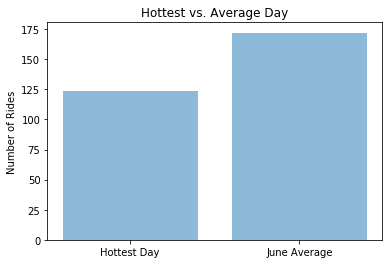

In [66]:
specific_date = df[(df['StartDate'].dt.month==6) & (df['StartDate'].dt.year==2016) & (df['StartDate'].dt.day==23)]

june_data = df[(df['StartDate'].dt.month==6) & (df['StartDate'].dt.year==2016)]

date_sum = specific_date.StartDate.value_counts().mean()

june_average = june_data.StartDate.value_counts().mean()


objects = ('Hottest Day', 'June Average')
y_pos = np.arange(len(objects))
date = [date_sum, june_average]
 

plt.bar(y_pos, date, align='center', alpha=.5)
plt.xticks(y_pos, objects)
plt.ylabel('Number of Rides')
plt.title('Hottest vs. Average Day')

As we can see the june average bicycle rides per day is higher than on the hottest day.  Let's check if our findings are statistically significant.  


In [97]:
#We will begin by finding the standard deviation of the june average

print(june_data.StartDate.value_counts().describe())

#Now that we can see a bit of what the June data looks like.
#Lets perform a one-sample ttest
from scipy import stats

print(stats.ttest_1samp(june_data.StartDate.value_counts(), specific_date.StartDate.value_counts()))


count     30.000000
mean     172.100000
std       74.064906
min       70.000000
25%      129.000000
50%      146.000000
75%      186.250000
max      367.000000
Name: StartDate, dtype: float64
Ttest_1sampResult(statistic=2016-06-23    3.557077
Name: StartDate, dtype: float64, pvalue=array([0.00131162]))


Here we can see the likelihood of this specific point being in the data set. There is a very strong likelihood that the hottest day belongs in june based on the p value of the array which is .00131162. 

# Future Research

There have been a lot of assumptions that needed to be made for either formatting, cleansliness, errors and situational understanding.

In future research I would like to return to these assumptions and look with a stronger lense at these ideas and thoughts.  In particular I would like to play around with the ideal time on a bicycle and properly look through the data set and be able to determine how the errors were created.  If they were all merely test data or if there is an issue in entry.  

For question 1: I would want to look into the effects on specific days of the week and determine which days would be the most likely to have bicycle riders and if so which type of rider would it be.  Understanding this would help the city form a proper maintenance plan of the cycles and create a better understanding of how many bikes they may need out at a time.  

For question 3:  I would want to understand and see the effects of rain and other precipitation like snow, and hail on the bike trips.  Even cross comparing this with station usage would be very interesting as I feel like it may illuminate which subscribers use the bikes as their main mode of transportation.  Another interesting facet to drill into would be the wind speed and how it effects bike patterns.  Wind has such a huge effect on peoples ability to cycle comfortably and would be interesting to study.

For question 2:  Being able to look at the top station use was very interesting and an interesting place to take that would be involving the user ids and see if the subscriber users use the same bike outposts week in and week out.  To see if you couldn't predict their routes and time frames.

Overall, these two data sets combined create a very rich and involved study that was not fully explored in this short capstone.  Looking into these trends will be able to help the city plan their bike service better and with a better understanding of their underlying clientel.  